In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df=pd.read_excel('/content/drive/MyDrive/Compile_Label_Data.xlsx')

In [3]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report


In [4]:
y = df['Label']
X_train, X_val, y_train, y_val = train_test_split(df['Lemma'], y, test_size=0.3, stratify=y, random_state=42)

In [5]:
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_val = vectorizer.transform(X_val)

In [6]:
batch_size = 10000
X_train_batches = [X_train[i:i+batch_size] for i in range(0, X_train.shape[0], batch_size)]
y_train_batches = [y_train[i:i+batch_size] for i in range(0, y_train.shape[0], batch_size)]

In [7]:
dt = DecisionTreeClassifier(max_depth= 8, min_samples_leaf= 3, min_samples_split= 6,class_weight='balanced')
for i in range(len(X_train_batches)):
    dt.fit(X_train_batches[i], y_train_batches[i])

In [8]:
y_pred = dt.predict(X_val)
print(f"Batch {i+1} classification report:")
print(classification_report(y_val, y_pred))

Batch 9 classification report:
              precision    recall  f1-score   support

           0       0.53      0.84      0.65     17605
           1       0.72      0.36      0.48     20621

    accuracy                           0.58     38226
   macro avg       0.62      0.60      0.56     38226
weighted avg       0.63      0.58      0.56     38226



In [9]:
Data2=pd.read_excel('/content/drive/MyDrive/FYP VIVA Presentation/unlabelled data2.xlsx')

In [10]:
X_test = Data2['Lemma']
X_test_transformed = vectorizer.transform(X_test)
y_pred_test = dt.predict(X_test_transformed)

In [11]:
y_true=Data2['clusters']

In [12]:
print(classification_report(y_true, y_pred_test))

              precision    recall  f1-score   support

           0       0.22      0.14      0.17       880
           1       0.88      0.93      0.90      5765

    accuracy                           0.82      6645
   macro avg       0.55      0.53      0.54      6645
weighted avg       0.79      0.82      0.80      6645



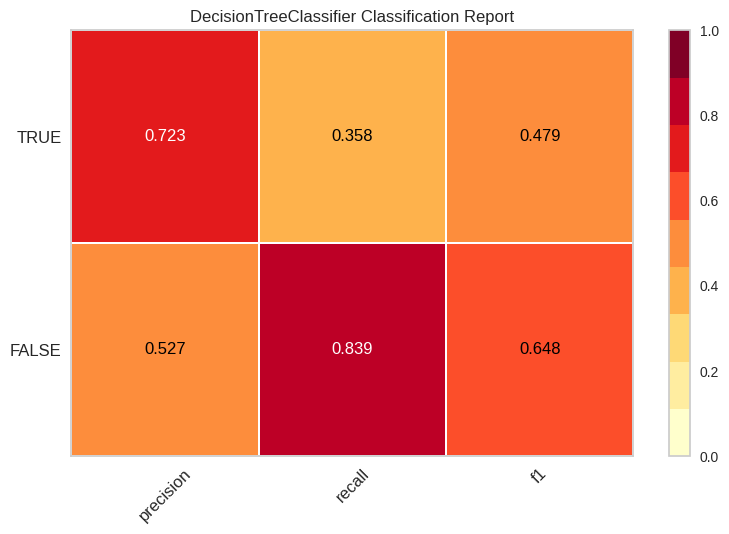

<Axes: title={'center': 'DecisionTreeClassifier Classification Report'}>

In [13]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(dt, classes=['FALSE', 'TRUE'])
visualizer.fit(X_train, y_train)
visualizer.score(X_val, y_val)
visualizer.show()

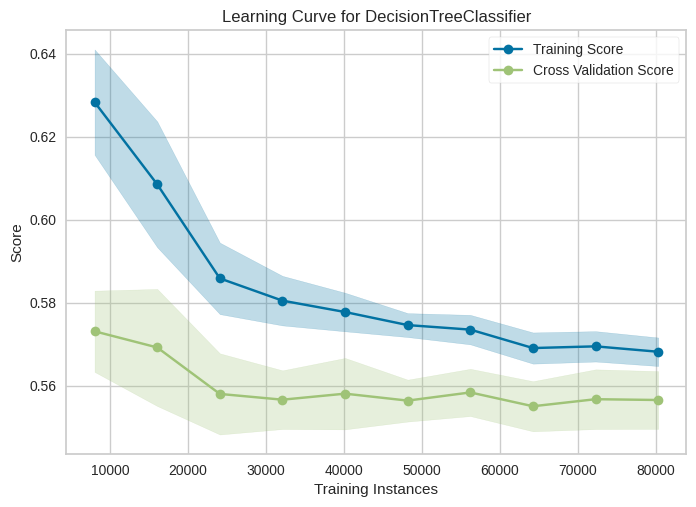

<Axes: title={'center': 'Learning Curve for DecisionTreeClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [14]:
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import LearningCurve
cv = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

lc_viz = LearningCurve(
    dt, cv=cv, scoring='f1_weighted', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

lc_viz.fit(X_train, y_train)
lc_viz.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
dt_params = {'max_depth': [2, 4, 6, 8],
              'min_samples_split': [2, 4, 6, 8],
              'min_samples_leaf': [1, 2, 3, 4]}

In [ ]:
dt_grid = GridSearchCV(dt, dt_params, cv=5,n_jobs=1)

In [ ]:
dt_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              max_depth=15,
                                              min_samples_split=5),
             n_jobs=1,
             param_grid={'max_depth': [2, 4, 6, 8],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 4, 6, 8]})

In [ ]:
print("Decision tree best params:", dt_grid.best_params_)

Decision tree best params: {'max_depth': 8, 'min_samples_leaf': 3, 'min_samples_split': 6}
